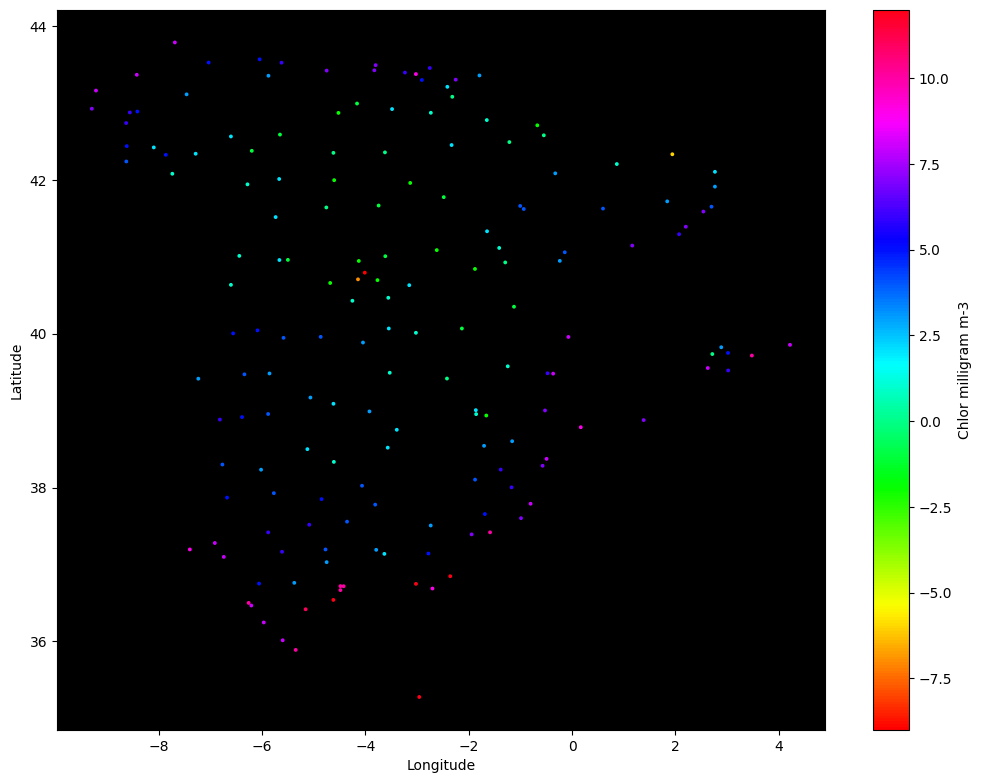

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import NearestNDInterpolator

fecha = '2021-01-02'

df = pd.read_csv(f'./ClimaDataSmall/Aemet{fecha}.csv')
df = df.iloc[:,[-1,-2,4]]
df = df.query('Latitude > 30 and Latitude < 44 and Longitude > -20')
a = []
for _ in df.iloc[:, 2].values:
    a.append(round(float(_)))

plt.subplot(111)
plt.scatter(df['Longitude'], df['Latitude'], s=3, marker='o', c=a, cmap=plt.cm.hsv)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar=plt.colorbar()
cbar.set_label('Chlor milligram m-3')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
ax = plt.gca()
ax.set_facecolor('xkcd:black')
plt.show()

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import NearestNDInterpolator
from scipy.interpolate import griddata, LinearNDInterpolator

def viewheatmap(fecha = '2021-01-02', colum = 'Temperatura media (ºC)', incendios = False):
    df = pd.read_csv(f'./ClimaDataSmall/Aemet{fecha}.csv')
    columnIndex = df.columns.get_loc(colum)
    df = df.iloc[:,[-1,-2,columnIndex]]
    df = df.query('Latitude > 30 and Latitude < 44 and Longitude > -20')
    if colum == 'Velocidad máxima (km/h)':
        for _ in range(len(df)):
            df.iloc[_,2] = df.iloc[_,2][:df.iloc[_,2].find(' ')]
    a = []
    for _ in df.iloc[:, 2].values:
        a.append(round(float(_)))

    plt.subplot(111)
    plt.scatter(df['Longitude'], df['Latitude'], s=3, marker='o', c=a, cmap=plt.cm.hsv)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    cbar=plt.colorbar()
    cbar.set_label('Chlor milligram m-3')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
    ax = plt.gca()
    ax.set_facecolor('xkcd:black')
    #plt.show()
    miny, maxy = min(df['Longitude']), max(df['Latitude'])
    minx, maxx = min(df['Longitude']), max(df['Latitude'])
    grdi_x = np.linspace(minx, maxx, num=300, endpoint=False)
    grdi_y = np.linspace(miny, maxy, num=300, endpoint=False)
    yg, xg = np.meshgrid(grdi_y, grdi_x, indexing='ij')
    x_g = xg.ravel()
    y_g = yg.ravel()

    df2 = df.drop([colum], 1)
    df3 = df[colum]
    points = np.array(df2)
    values = np.array(df3)
    interpolador = NearestNDInterpolator(points, values)
    est_u = interpolador(x_g, y_g)

    #Sow Map without incendios

    grid_z0 = griddata(points, values, (x_g, y_g), method='linear')
    plt.subplot(111)
    plt.scatter(x_g, y_g, s=40, marker='s', c=grid_z0, cmap=plt.cm.hsv)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    cbar=plt.colorbar()
    cbar.set_label('Chlor milligram m-3')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=1, wspace=0.2, hspace=0.2)
    ax = plt.gca()
    ax.set_facecolor('xkcd:black')

    #Sow Map with incendios
    if incendios:
        aa = pd.read_csv("./modis_2021_Spain_incendios.csv")
        aa = aa.query('latitude > 30')
        aa = aa[(aa['acq_date'] == fecha)]
        y = aa["latitude"]
        x = aa["longitude"]
        plt.scatter(x, y, c='black', marker="X")

    plt.show()

Velocidad máxima (km/h)


/tmp/ipykernel_200252/4094697525.py:37: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df.drop([colum], 1)
/tmp/ipykernel_200252/4094697525.py:47: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)


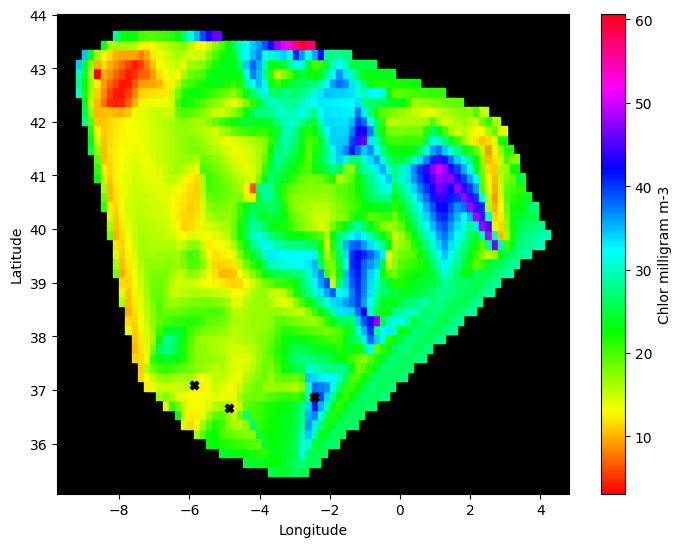

Precipitación 00-24h (mm)


/tmp/ipykernel_200252/4094697525.py:37: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df.drop([colum], 1)
/tmp/ipykernel_200252/4094697525.py:47: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)


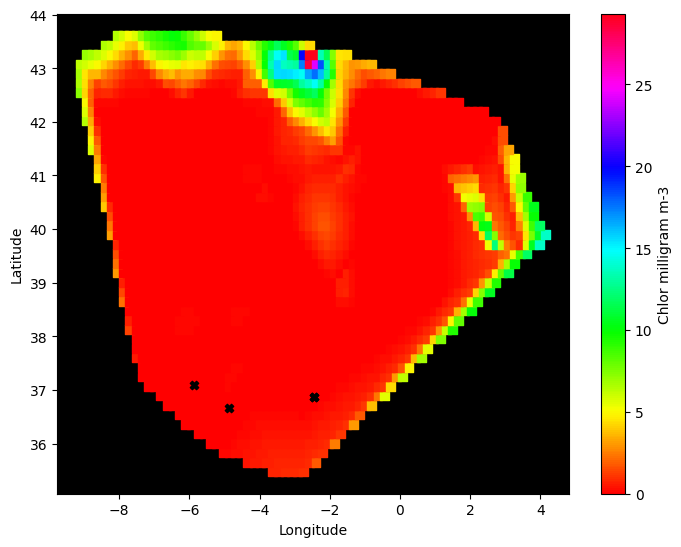

Temperatura media (ºC)


/tmp/ipykernel_200252/4094697525.py:37: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df.drop([colum], 1)
/tmp/ipykernel_200252/4094697525.py:47: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)


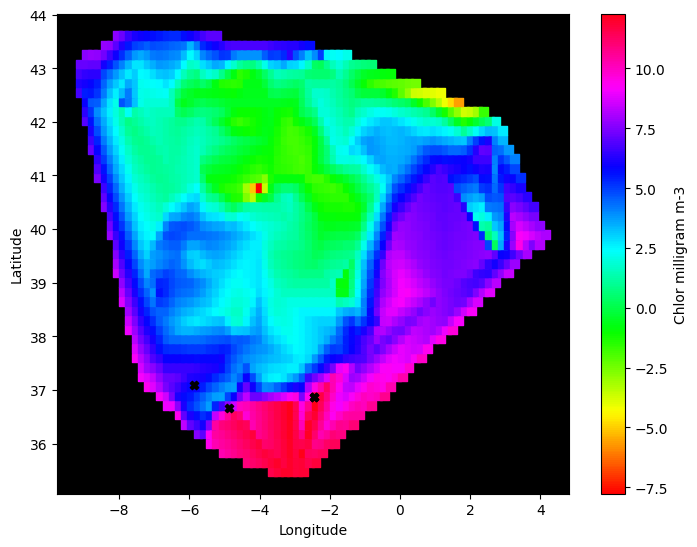

In [357]:
print('Velocidad máxima (km/h)')
viewheatmap(colum = 'Velocidad máxima (km/h)',incendios=True)
print('Precipitación 00-24h (mm)')
viewheatmap(colum = 'Precipitación 00-24h (mm)',incendios=True)
print('Temperatura media (ºC)')
viewheatmap(incendios=True)

/tmp/ipykernel_197554/29968713.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df.drop(['Temperatura media (ºC)'], 1)


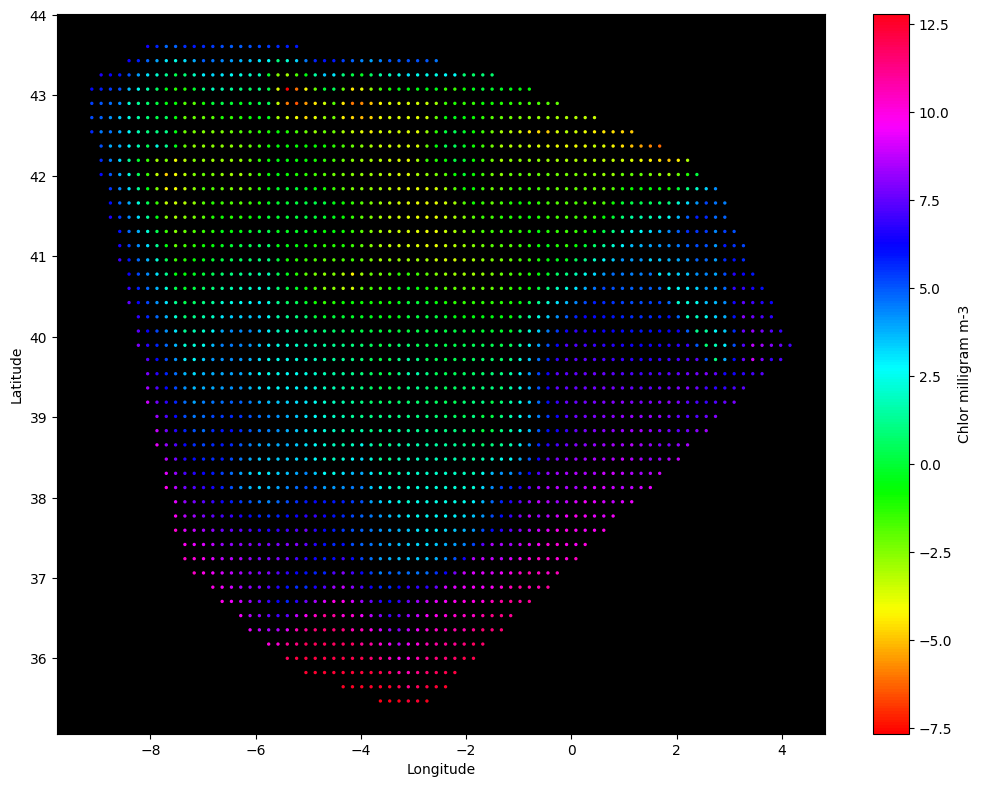

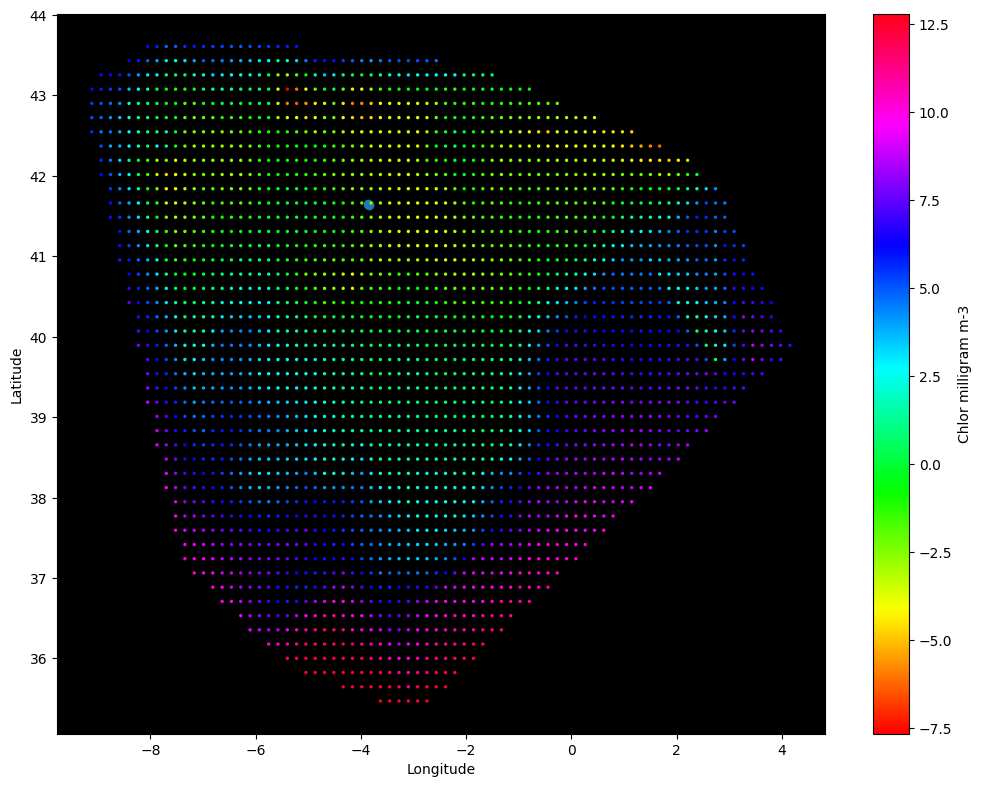

array([nan, nan, nan, ..., nan, nan, nan])

In [72]:
miny, maxy = min(df['Longitude']), max(df['Latitude'])
minx, maxx = min(df['Longitude']), max(df['Latitude'])
grdi_x = np.linspace(minx, maxx, num=300, endpoint=False)
grdi_y = np.linspace(miny, maxy, num=300, endpoint=False)
yg, xg = np.meshgrid(grdi_y, grdi_x, indexing='ij')
x_g = xg.ravel()
y_g = yg.ravel()




df2 = df.drop(['Temperatura media (ºC)'], 1)
df3 = df['Temperatura media (ºC)']
points = np.array(df2)
values = np.array(df3)
interpolador = NearestNDInterpolator(points, values)
est_u = interpolador(x_g, y_g)

from scipy.interpolate import griddata

#Sow Map without incendios

grid_z0 = griddata(points, values, (x_g, y_g), method='linear')
plt.subplot(111)
plt.scatter(x_g, y_g, s=2, marker='o', c=grid_z0, cmap=plt.cm.hsv)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
cbar=plt.colorbar()
cbar.set_label('Chlor milligram m-3')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
ax = plt.gca()
ax.set_facecolor('xkcd:black')
plt.show()

#Sow Map with incendios

aa = pd.read_csv("./modis_2021_Spain_incendios.csv")
aa = aa.query('latitude > 30')
aa = aa[(aa['acq_date'] == fecha)]
y = aa["latitude"]
x = aa["longitude"]
plt.scatter(x, y)

grid_z0 = griddata(points, values, (x_g, y_g), method='linear')
plt.subplot(111)
plt.scatter(x_g, y_g, s=2, marker='o', c=grid_z0, cmap=plt.cm.hsv)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
cbar=plt.colorbar()
cbar.set_label('Chlor milligram m-3')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
ax = plt.gca()
ax.set_facecolor('xkcd:black')
plt.show()

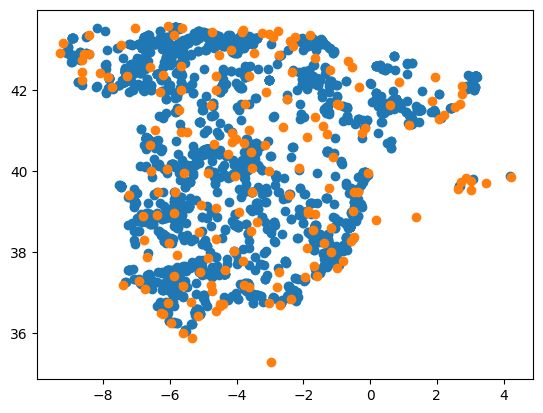

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
ee = pd.read_csv("./modis_2021_Spain_incendios.csv")
ee = ee.query('latitude > 30')
y2 = ee["latitude"]
x2 = ee["longitude"]
plt.scatter(x2, y2)

asdasdasd = pd.read_csv('./ClimaDataSmall/Aemet2021-01-02.csv')
asdasdasd = asdasdasd.iloc[1:,[-1,-2,4]]
asdasdasd = asdasdasd.query('Latitude > 30 and Latitude < 44 and Longitude > -20')
y = asdasdasd["Latitude"]
x = asdasdasd["Longitude"]
plt.scatter(x, y)
plt.show()